For this notebook, I would like to thank Ilaria Gavetti. As I had little knowledge of brain data, she sat down with me to do the explanatory data analysis of the data.

# Participants Data



In [ ]:
# importeer Packages
import os
import numpy as np
import pandas as pd

In [ ]:
# set folder containing participants data as working directory
working_directory = "/content/drive/MyDrive/TD-BRAIN/TDBRAIN_participants_V2_data"
os.chdir(working_directory)
os.getcwd()

'/content/drive/MyDrive/TD-BRAIN/TDBRAIN_participants_V2_data'

In [ ]:
# load participants data
df_full = pd.read_csv('TDBRAIN_participants_V2.tsv', sep='\t', decimal=',')
df_full = df_full[df_full['participants_ID'].notna()]
df_full

,participants_ID,DISC/REP,indication,formal_status,Dataset,Consent,sessSeason,sessTime,Responder,Remitter,...,BDI_post,rTMS PROTOCOL,ADHD_pre_Hyp_leading,ADHD_pre_Att_leading,ADHD_post_Att_leading,ADHD_post_Hyp_leading,NF Protocol,YBOCS_pre,YBOCS_post,Unnamed: 110
0,sub-19681349,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,2,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
1,sub-19681385,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,1,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
2,sub-19684666,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,1,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
3,sub-19686324,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,2,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
4,sub-19687321,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,3,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,sub-88078657,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,fall,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,sub-88078749,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,sub-88078793,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,sub-88078837,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# only select relevant variables for current project
df_participants = df_full.loc[:, ('participants_ID', 'DISC/REP', 'indication', 'formal_status', 'Dataset', 'age', 'gender', 'sessID', 'nrSessions', 'EC', 'EO')]
df_participants = df_participants[df_participants['DISC/REP'] == 'DISCOVERY'] # select the discovery group

# create diagnosis variable from indication if formal_status is UNKNOWN
df_participants['diagnosis'] = df_participants['formal_status']
df_participants.loc[df_participants['diagnosis'] == 'UNKNOWN', 'diagnosis'] = df_participants['indication']

df_participants

,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis
120,sub-87963457,DISCOVERY,BURNOUT,BURNOUT,NaN,NaN,0.0,1.0,1.0,1.0,1.0,BURNOUT
121,sub-87963593,DISCOVERY,BURNOUT,BURNOUT,NaN,52.90,1.0,1.0,1.0,1.0,1.0,BURNOUT
122,sub-87963725,DISCOVERY,SMC,UNKNOWN,NaN,77.99,0.0,1.0,1.0,1.0,1.0,SMC
123,sub-87963769,DISCOVERY,SMC,UNKNOWN,NaN,83.30,1.0,1.0,1.0,1.0,1.0,SMC
124,sub-87964717,DISCOVERY,SMC,UNKNOWN,NaN,58.29,0.0,1.0,2.0,1.0,1.0,SMC
...,...,...,...,...,...,...,...,...,...,...,...,...
1342,sub-88078657,DISCOVERY,INSOMNIA,INSOMNIA,NaN,58.59,1.0,1.0,1.0,1.0,1.0,INSOMNIA
1343,sub-88078749,DISCOVERY,INSOMNIA,INSOMNIA,NaN,37.22,0.0,1.0,1.0,1.0,1.0,INSOMNIA
1344,sub-88078793,DISCOVERY,INSOMNIA,INSOMNIA,NaN,48.54,1.0,1.0,1.0,1.0,1.0,INSOMNIA
1345,sub-88078837,DISCOVERY,INSOMNIA,INSOMNIA,NaN,24.63,1.0,1.0,1.0,1.0,1.0,INSOMNIA


In [ ]:
import pandas as pd

# Eerst, inspecteer enkele van de vermeldingen in de diagnosekolom
print(df_participants['diagnosis'].unique())
print(df_participants['diagnosis'].value_counts())

# Definieer een functie die diagnoses classificeert, waarbij wordt aangepast voor variaties
def classify_diagnosis(diagnosis):
    if pd.isna(diagnosis):
        return 'Other'  # Behandel ontbrekende waarden
    diagnosis = str(diagnosis).strip()  # Converteer naar een string en verwijder eventuele spaties
    if diagnosis == 'HEALTHY':
        return 'HEALTHY'
    elif diagnosis == 'MDD':
        return 'MDD'
    return 'Other'

# Pas de classificatiefunctie toe op het dataframe
df_participants['diagnosis_group'] = df_participants['diagnosis'].apply(classify_diagnosis)

# Filter 'Other' en 'Comorbidity' categorieën eruit als ze niet nodig zijn
df_participants = df_participants[df_participants['diagnosis_group'].isin(['HEALTHY', 'MDD'])]

# Print het aantal om de classificatie te verifiëren
print("Counts in df_participants:")
print(df_participants['diagnosis_group'].value_counts())
print("Unique participant IDs count:", df_participants['participants_ID'].nunique())


['BURNOUT' 'SMC' 'HEALTHY' 'Dyslexia' 'CHRONIC PAIN' 'MDD' nan 'ADHD'
 'ADHD/ASPERGER' 'PDD NOS/DYSLEXIA' 'PDD NOS' 'WHIPLASH' 'ANXIETY'
 'ADHD/DYSLEXIA' 'ASD' 'TINNITUS' 'OCD' 'Tinnitus' 'PDD NOS ' 'PANIC'
 'MDD/ANXIETY' 'MIGRAINE' 'PDD NOS/ANXIETY' 'PARKINSON' 'BIPOLAR'
 'DYSPRAXIA' 'TINNITUS/MDD' 'ADHD/ASD/ANXIETY' 'MDD/ADHD' 'ADHD/PDD NOS'
 'ASPERGER' 'ADHD/EPILEPSY' 'PDD NOS/GTS' 'PDD NOS/ADHD' 'PDD NOS/ASD'
 'TBI' 'ADD' 'ADHD/ANXIETY' 'ADHD/DYSLEXIA/DYSCALCULIA' 'ADHD/MDD'
 'MDD/PANIC' 'DEPERSONALIZATION' 'MDD/TRAUMA' 'PTSD/ADHD' 'MDD/TUMOR'
 'ADHD/GTS' 'OCD/MDD' 'MDD/OCD' 'CONVERSION DX' 'ASD/ASPERGER'
 'MDD/ADHD/LYME' 'MSA-C' 'STROKE/PAIN' 'STROKE ' 'MDD/OCD/ADHD'
 'EPILEPSY/OCD' 'ADHD ' 'INSOMNIA' 'MDD/ADHD/ANOREXIA'
 'MDD/ANXIETY/TINNITUS']
diagnosis
MDD                          323
ADHD                         176
SMC                          119
OCD                           49
HEALTHY                       47
INSOMNIA                      32
TINNITUS                      3

In [ ]:
# change variables to correct data types
dtypes_dict = {'participants_ID' : 'string', 'DISC/REP' : 'category',
                'indication' : 'category', 'formal_status' : 'category',
                'Dataset' : 'category', 'age' : 'float', 'gender' : 'int',
                'sessID' : 'int', 'nrSessions' : 'int', 'EC' : 'bool', 'EO' : 'bool', 'diagnosis' : 'category'}
df_participants = df_participants.astype(dtypes_dict)
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 245 to 1330
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   participants_ID  370 non-null    string  
 1   DISC/REP         370 non-null    category
 2   indication       370 non-null    category
 3   formal_status    370 non-null    category
 4   Dataset          132 non-null    category
 5   age              360 non-null    float64 
 6   gender           370 non-null    int64   
 7   sessID           370 non-null    int64   
 8   nrSessions       370 non-null    int64   
 9   EC               370 non-null    bool    
 10  EO               370 non-null    bool    
 11  diagnosis        370 non-null    category
 12  diagnosis_group  370 non-null    object  
dtypes: bool(2), category(5), float64(1), int64(3), object(1), string(1)
memory usage: 23.4+ KB


In [ ]:
# check for missing EC or EO recordings
print(df_participants[df_participants['EC'] == False].shape[0])
print(df_participants[df_participants['EO'] == False].shape[0])
df_participants[df_participants['EO'] == False]

0
0


,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis,diagnosis_group


In [ ]:
# store dataframe as pickle file
df_participants.to_pickle('df_participants.pkl')
df_test = pd.read_pickle('df_participants.pkl')
df_test

,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis,diagnosis_group
245,sub-87974617,DISCOVERY,HEALTHY,HEALTHY,NaN,NaN,0,1,1,True,True,HEALTHY,HEALTHY
246,sub-87974621,DISCOVERY,HEALTHY,HEALTHY,NaN,NaN,0,1,1,True,True,HEALTHY,HEALTHY
247,sub-87974665,DISCOVERY,HEALTHY,HEALTHY,NaN,23.37,0,1,1,True,True,HEALTHY,HEALTHY
248,sub-87974709,DISCOVERY,HEALTHY,HEALTHY,NaN,20.31,1,1,1,True,True,HEALTHY,HEALTHY
249,sub-87974841,DISCOVERY,HEALTHY,HEALTHY,NaN,21.59,1,1,1,True,True,HEALTHY,HEALTHY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,sub-88076941,DISCOVERY,MDD,UNKNOWN,NaN,42.53,0,1,1,True,True,MDD,MDD
1326,sub-88077345,DISCOVERY,MDD,UNKNOWN,NaN,57.78,1,1,1,True,True,MDD,MDD
1328,sub-88077525,DISCOVERY,MDD,UNKNOWN,NaN,35.08,0,1,1,True,True,MDD,MDD
1329,sub-88077569,DISCOVERY,MDD,UNKNOWN,NaN,21.38,0,1,1,True,True,MDD,MDD


In [ ]:
df_participants['participants_ID'].nunique()

362

# Explanatory data analysis

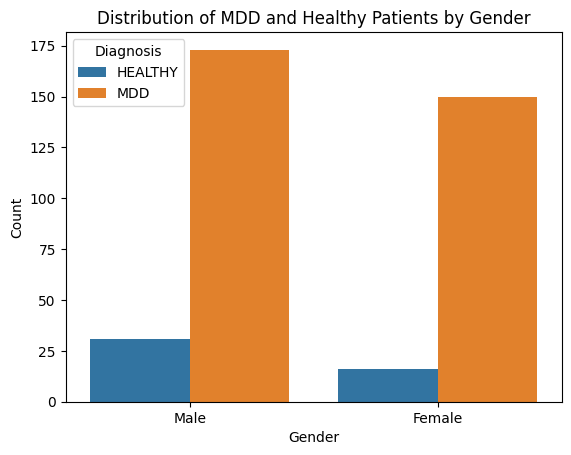

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Maak een nieuw dataframe met alleen 'HEALTHY' en 'MDD' diagnoses
df_filtered = df_participants[df_participants['diagnosis_group'].isin(['HEALTHY', 'MDD'])]

# Plot het aantal patiënten per geslacht en diagnose
sns.countplot(data=df_filtered, x='gender', hue='diagnosis_group')

# Pas de labels aan
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of MDD and Healthy Patients by Gender')
plt.xticks([0, 1], ['Male', 'Female'])

# Toon de plot
plt.legend(title='Diagnosis')
plt.show()


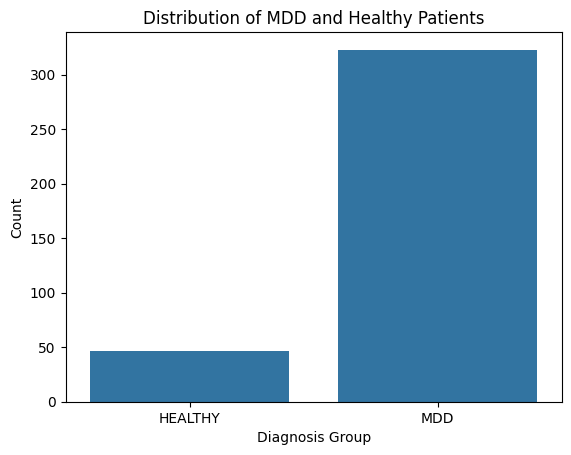

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot het aantal MDD en Healthy patiënten zonder onderscheid naar geslacht
sns.countplot(data=df_filtered, x='diagnosis_group')

# Pas de labels aan
plt.xlabel('Diagnosis Group')
plt.ylabel('Count')
plt.title('Distribution of MDD and Healthy Patients')
plt.xticks([0, 1], ['HEALTHY', 'MDD'])

# Toon de plot
plt.show()
